In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing and reading the dataset
df = pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [20]:
df['q'] = 1
dfi = df.groupby(['Member_number','itemDescription'])['q'].sum().unstack().applymap(lambda x: 1 if x >= 1 else 0).astype('bool')

In [28]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

# create apriori algorithm
def AP(df, min_support, min_thresh, metric):
    ap = apriori(df, min_support = min_support, use_colnames=True)
    #rules = association_rules(ap, metric=  metric, min_threshold = min_thresh)
    pass

# create fp-growth algorithm
def FP(df, min_support, min_thres, metric):
    fp = fpgrowth(df, min_support = min_support, use_colnames=True)
    #rules = association_rules(fp, metric= metric, min_threshold = min_thresh)
    pass



In [29]:
# create threads 
import threading
import os
import time

t1 = threading.Thread(target = AP(dfi, 0.5, 0.8, 'confidence'), name = 'Apriori Thread')
t2 = threading.Thread(target = FP(dfi, 0.5, 0.8, 'confidence'), name = 'FP-growth Thread')

# timer

record = {'AP':0,
        'FP':0}

start = time.time()
t1.start()
t1.join()
end  = time.time() - start
record['AP'] = end

start = time.time()
t2.start()
t2.join()
end  = time.time() - start
record['FP'] = end






<Axes: >

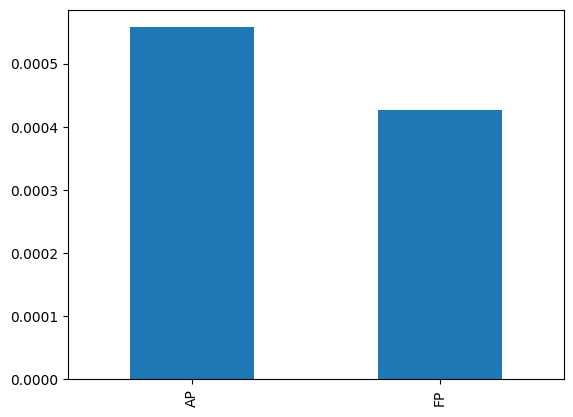

In [36]:
pd.Series(record).plot(kind='bar')

In [21]:
dfi

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
time.time()

TypeError: time.time() takes no arguments (1 given)

In [ ]:
def measure_execution_time(algo):
    start_time = time.time()
    func()
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time


In [ ]:
# multi-threading
import threading as t

t1 = 
